## Lab 5: Hypothesis Testing in R
#### MA 189 Data Dive Into Birmingham (with R)
##### _Blazer Core: City as Classroom_

Course Website: [Github.com/kerenli/statbirmingham/](https://github.com/kerenli/statbirmingham/) 


#### Levels:
<div class="alert-success"> Concepts and general information</div>
<div class="alert-warning"> Important methods and technique details </div>
<div class="alert-info"> Extended reading </div>
<div class="alert-danger"> (Local) Examples, assignments, and <b>Practice in Birmingham</b> </div>

In this lab, we will explore hypothesis testing using R. We will cover both one-sample and two-sample tests for means and proportions. The goal is to apply these tests to real-world data and interpret the results in the context of Birmingham.

<div class="alert alert-block alert-danger"><b>Example:</b> Auto Racing Pit Stop Times</div>

A pit crew claims that its mean pit stop time for 4 new tires and fuel is only 13 seconds. The driver thinks it's more and wants to investigate for efficiency purposes.

### Steps:
1. Formulate the hypotheses:
    - Null hypothesis (H₀): The mean pit stop time is 13 seconds.
    - Alternative hypothesis (Hₐ): The mean pit stop time is greater than 13 seconds.
2. Use a one-sample $t$-test to determine if the observed mean pit stop time is significantly greater than 13 seconds.

In [1]:
# Simulate a dataset of pit stop times (in seconds)
pit_stop_times <- rnorm(20, mean = 14, sd = 1)  # Simulate 20 pit stop times

# Perform the one-sample t-test
t_test_pit_stop <- t.test(pit_stop_times, mu = 13, alternative = "greater")

# View the test results
t_test_pit_stop


	One Sample t-test

data:  pit_stop_times
t = 5.8798, df = 19, p-value = 5.8e-06
alternative hypothesis: true mean is greater than 13
95 percent confidence interval:
 13.65345      Inf
sample estimates:
mean of x 
 13.92567 


- $t$-value ($5.8798$): The sample mean is 5.8798 standard errors above the hypothesized mean.
- $p$-value ($5.8e-06$): Since the p-value is much less than 0.05, we reject the null hypothesis at the 5% significance level. This suggests that there is evidence that the mean pit stop time is 13 seconds.
- Confidence Interval ($13.65345$ to $\text{Inf}$): Since the hypothesized mean ($13$) is below the 95% confidence interval, this also supports the conclusion that the true mean stop time could be greater than $13$.
- Sample Mean ($13.92567$): The sample mean stop time is $13.92567$, which is higher than 13.

<div class="alert alert-block alert-danger"><b>Example:</b> Cereal Box Weight</div>
Cocoa Puffs boxes claim there is an average of 19.3oz of cereal in the box. A grumpy college student believes the box contains less than 19oz and wants to find out more.

### Steps:
1. Formulate the hypotheses:
    - Null hypothesis (H₀): The mean weight of cereal in the box is 19.3oz.
    - Alternative hypothesis (Hₐ): The mean weight is less than 19.3oz.
2. Use a one-sample $t$-test to determine if the observed mean weight is significantly less than 19.3oz.

In [2]:
# Simulate a dataset of cereal box weights (in ounces)
cereal_weights <- rnorm(30, mean = 19.1, sd = 0.2)  # Simulate 30 box weights

# Perform the one-sample t-test
t_test_cereal <- t.test(cereal_weights, mu = 19.3, alternative = "less")

# View the test results
t_test_cereal


	One Sample t-test

data:  cereal_weights
t = -6.7153, df = 29, p-value = 1.143e-07
alternative hypothesis: true mean is less than 19.3
95 percent confidence interval:
    -Inf 19.1543
sample estimates:
mean of x 
 19.10495 


<div class="alert alert-block alert-danger"><b>Example:</b> Promotion File Study</div>
In a 1972 experiment, 48 male bank supervisors each judged a pile of files to decide whether or not each person should receive a promotion. The files were IDENTICAL besides that half were labeled "male" and the other half labeled "female." In total, 35 files were recommended for promotion—21 "male" files and 14 "female" files. Was there bias present against "female" files?

### Steps:
1. Formulate the hypotheses:
    - Null hypothesis (H₀): The proportion of promotions is the same for "male" and "female" files.
    - Alternative hypothesis (Hₐ): The proportion of promotions is different between "male" and "female" files.
2. Use a two-sample proportion test to determine if there is a significant difference in the promotion rates.

In [3]:
# Data: Number of files recommended for promotion
male_promotions <- 21
female_promotions <- 14

# Total number of files in each group
total_male_files <- 24
total_female_files <- 24

# Perform the two-sample proportion test
prop_test_promotion <- prop.test(c(male_promotions, female_promotions), 
                                 c(total_male_files, total_female_files))

# View the test results
prop_test_promotion


	2-sample test for equality of proportions with continuity correction

data:  c(male_promotions, female_promotions) out of c(total_male_files, total_female_files)
X-squared = 3.7978, df = 1, p-value = 0.05132
alternative hypothesis: two.sided
95 percent confidence interval:
 0.01249145 0.57084188
sample estimates:
   prop 1    prop 2 
0.8750000 0.5833333 


<div class="alert alert-block alert-danger"><b>Local Application:</b> World Rugby Shop Page Views</div>
The World Rugby Shop, based here in Birmingham, keeps careful records of its data. Consider the total number of page views for rugby shorts each week from users in Canada, the US, and the UK combined.

### Steps:
1. Take a quick look at the data and make a hypothesis for what the average weekly number of page views is for this item.
2. Let's say Dr. Li thinks it's higher and wants to investigate this by taking a sample of 45 randomly selected weeks from available data from June 2020 to April 2022 and performing a hypothesis test to test the belief that the average number of weekly views is greater than your hypothesized value.

In [8]:
library(readxl)

# Define the path to the Excel file
file_path <- "data/WRS Shorts Data Canada Australia UK.xlsx"

# Read the Excel file from the "data" subfolder
WRS_data <- read_excel(file_path)

# Hypothetical hypothesis: The mean number of page views is 1500
hypothesized_mean <- 1500

# Perform the one-sample t-test
t_test_WRS <- t.test(WRS_data$`Total Pageviews`, mu = hypothesized_mean, alternative = "greater")

# View the test results
t_test_WRS



	One Sample t-test

data:  WRS_data$`Total Pageviews`
t = -55.365, df = 95, p-value = 1
alternative hypothesis: true mean is greater than 1500
95 percent confidence interval:
 321.5383      Inf
sample estimates:
mean of x 
 355.8646 


### <div class="alert alert-block alert-danger"><b>Local Example: Pizza Preference and Age</b></div>

Suppose a survey is conducted here in Birmingham with the following questions:
1. Which pizza restaurant do you prefer: Slice, Pizza Grace, or Pizzeria G.M.?
2. Are you over the age of 30?

The responses are summarized in the two-way table below:

|                     | Slice | Pizza Grace | Pizzeria G.M. | TOTALS |
|---------------------|-------|-------------|---------------|--------|
| 30 years old or younger | 125   | 94          | 58            | 277    |
| Over 30 years old       | 68    | 157         | 36            | 261    |
| **TOTALS**              | 193   | 251         | 94            | 538    |

We are interested in determining whether there is an association between pizza restaurant preference and age.


#### Steps for the Chi-Square Test of Independence:

1. **Create the contingency table**.
2. **Perform the Chi-Square Test** in R.
3. **Interpret the result**.


### Step 1: Create the Contingency Table in R

In [1]:
# Create the contingency table
pizza_table <- matrix(c(125, 68, 94, 157, 58, 36), nrow = 2, byrow = TRUE)

# Name the rows and columns
rownames(pizza_table) <- c("30 or younger", "Over 30")
colnames(pizza_table) <- c("Slice", "Pizza Grace", "Pizzeria G.M.")

# View the table
pizza_table

,Slice,Pizza Grace,Pizzeria G.M.
30 or younger,125,68,94
Over 30,157,58,36


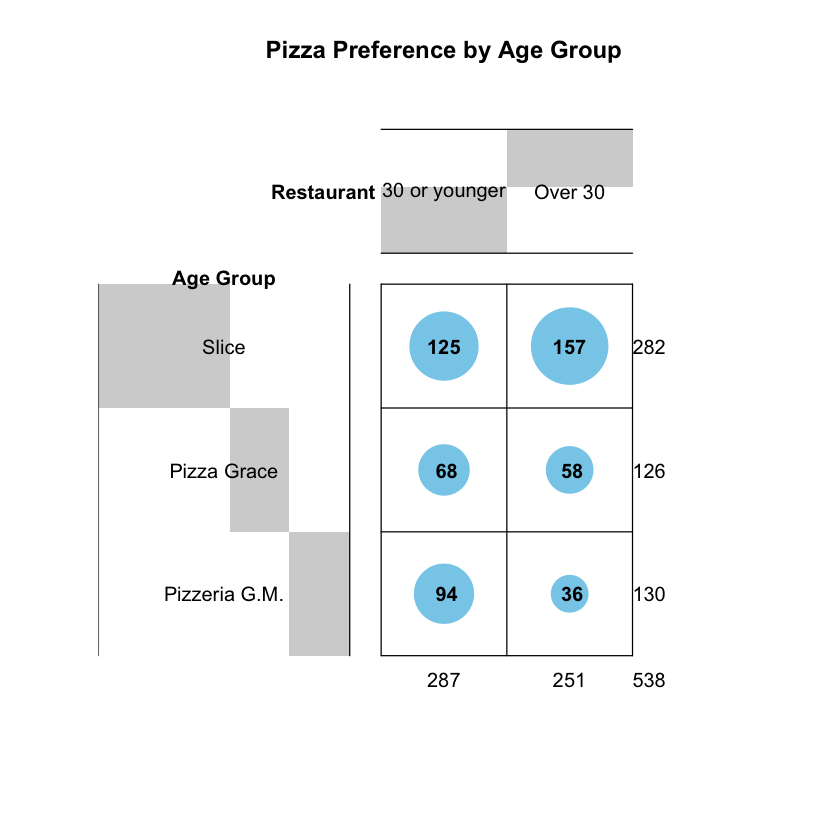

In [10]:
library(gplots)

# Create the contingency table
pizza_table <- matrix(c(125, 68, 94, 157, 58, 36), nrow = 2, byrow = TRUE)

# Name the rows and columns
rownames(pizza_table) <- c("30 or younger", "Over 30")
colnames(pizza_table) <- c("Slice", "Pizza Grace", "Pizzeria G.M.")

# Create the balloon plot
balloonplot(as.table(pizza_table), main ="Pizza Preference by Age Group", 
            xlab ="Restaurant", ylab="Age Group", label = TRUE, show.margins = TRUE)

### Step 2: Perform the Chi-Square Test of Independence

In [2]:
# Perform the chi-square test
chi_test <- chisq.test(pizza_table)

# View the test results
chi_test


	Pearson's Chi-squared test

data:  pizza_table
X-squared = 28.018, df = 2, p-value = 8.24e-07


### Step 3: Output Expected Frequencies

To see the expected frequencies under the assumption that there is no association between pizza preference and age, you can access the expected attribute from the chi_test result.

In [3]:
# Display expected frequencies
chi_test$expected

,Slice,Pizza Grace,Pizzeria G.M.
30 or younger,150.4349,67.21561,69.34944
Over 30,131.5651,58.78439,60.65056


### Step 4: Interpret the Result

The output of the chi-square test will include:

- **Chi-squared value**: The test statistic.
- **$p$-value**: Indicates whether the observed differences are statistically significant.
- **Degrees of freedom**: Used in the calculation of the test statistic.
- **Expected counts**: The counts that would be expected if there were no association between the variables.

If the $p$-value is less than your significance level (e.g., 0.05), you would reject the null hypothesis and conclude that there is a significant association between pizza preference and age.

In this example, with a very small p-value (8.24e-07), we would reject the null hypothesis and conclude that there is a significant association between age and pizza preference.

### <div class="alert alert-block alert-danger"><b>Practice in Birmingham:</b> Birmingham vs. Huntsville Temperatures</div>

**Part 1: Birmingham vs. Huntsville Temperatures**

The temperature highs for all 31 days of May 2024 are given here for Birmingham, AL: https://www.accuweather.com/en/us/birmingham/35203/may-weather/346630 and here for Huntsville, AL: https://www.accuweather.com/en/us/huntsville/35801/may-weather/326704?year=2024.


**Question 1:** Perform a two-sample t-test to determine if there is a significant difference in the average temperatures between Birmingham and Huntsville.

Hints:

Download temperature data from a reliable source or use simulated data.
Use `R` functions like `t.test()` to perform the hypothesis test.

##### Your answer:

**Question 2:** Calculate the proportion of days in Birmingham and Huntsville where the temperature exceeded 80°F. Perform a two-sample proportion test to see if there is a significant difference in these proportions.

Hints:

Use `prop.test()` to compare the proportions.

##### Your answer:

**Part 2: Estimating Actuary Salaries in Birmingham**

**Part 2: Birmingham vs. Huntsville Temperatures**


You are interested in becoming an actuary ([source](https://www.bls.gov/ooh/math/actuaries.htm)) but first want to design a study to estimate the average income of an actuary in the Birmingham area specifically. 

**Question 1: One-Sample t-Test on Actuary Income**

Suppose you collect income data from a sample of actuaries in Birmingham and find that the average income in your sample is \\$95,000. You want to test whether this is significantly different from the national average of \\$100,000.

### Steps:
1. Formulate the hypotheses:
    - Null hypothesis (H₀): The mean income in Birmingham is \\$100,000.
    - Alternative hypothesis (Hₐ): The mean income in Birmingham is not \\$100,000.
2. Use a one-sample $t$-test to determine if the observed mean income is significantly different from \\$100,000.

##### Your answer:

**Question 2: Proportion of Actuaries Earning Over \\$100,000**

You hypothesize that less than 50% of actuaries in Birmingham earn more than \\$100,000 annually. You want to test this hypothesis using the data you collected.

### Steps:
1. Formulate the hypotheses:
    - Null hypothesis (H₀): 50% of actuaries in Birmingham earn more than \\$100,000.
    - Alternative hypothesis (Hₐ): Less than 50% of actuaries in Birmingham earn more than \\$100,000.
2. Use a one-sample proportion test to determine if the observed proportion of actuaries earning over \\$100,000 is significantly less than 50%.

##### Your answer:

**Question 3: Two-Sample t-Test: Birmingham vs. Huntsville Actuary Incomes**

Now, imagine you also collect income data from actuaries in Huntsville. You want to test whether the average income of actuaries in Birmingham differs from that in Huntsville.

### Steps:
1. Formulate the hypotheses:
    - Null hypothesis (H₀): The mean income in Birmingham is equal to the mean income in Huntsville.
    - Alternative hypothesis (Hₐ): The mean incomes are different.
2. Use a two-sample t-test to compare the means of actuary incomes between Birmingham and Huntsville.

##### Your answer:

**Question 4: Sample Size Calculation for Proportion**

You want to estimate the proportion of actuaries in Birmingham earning over $100,000 with 90% confidence and a margin of error of 5%. Assuming the true proportion is around 40%, calculate the required sample size.


##### Your answer: